In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv('C:\\Users\\meghna\\Desktop\\My_Project\\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x = df.iloc[:,:-1]
#x is containing our record where we have all the rows & all the columns except the column 'Profit'
y = df.iloc[:,4]
#y is containing all the rows of the column 'profit' or can say profit of all the 50 startups

In [4]:
#State feature is categorical type, so we need to perform one hot encoding
st = pd.get_dummies(x['State'],drop_first=True) 
st.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [5]:
#Now we need to drop column 'State' from the dataset and concat one hot encoded 'state' feature in dataset
x = x.drop('State', axis=1)

In [6]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
x = pd.concat([x,st],axis=1)

In [8]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [9]:
#Descriptive Statistics
x.describe()

,R&D Spend,Administration,Marketing Spend,Florida,New York
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000


In [10]:
#split dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
#Fitting machine learning Linear Regression Model to the training set 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#predicting test set result
y_predict = reg.predict(x_test)
y_predict

array([104282.76472172, 132536.88499212, 133910.85007766,  72584.77489417,
       179920.9276189 , 114549.31079234,  66444.43261346,  98404.96840122,
       114499.82808602, 169367.50639895,  96522.6253998 ,  88040.6718287 ,
       110949.99405525,  90419.1897851 , 128020.46250064])

In [13]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
sc = r2_score(y_test,y_predict)
print(sc)

In [15]:
#R2 score is nearer to 1 ,means This model is good

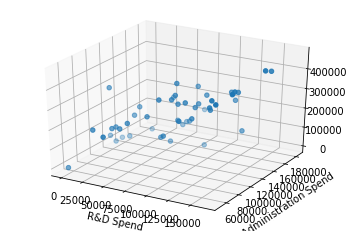

In [16]:
ax = plt.axes(projection='3d')
ax.scatter3D(x['R&D Spend'],x['Administration'],x['Marketing Spend'])
plt.xlabel('R&D Spend')
plt.ylabel('Administration Spend')
plt.show()